<a href="https://colab.research.google.com/github/imjmjmim/Indicator_Analysis/blob/main/Indicator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Date          Open          High           Low         Close  \
3223  2023-07-15  30331.783203  30407.781250  30263.462891  30295.806641   
3224  2023-07-16  30297.472656  30437.560547  30089.669922  30249.132813   
3225  2023-07-17  30249.626953  30336.400391  29685.783203  30145.888672   
3226  2023-07-18  30147.070313  30233.656250  29556.427734  29856.562500   
3227  2023-07-20  29919.064453  30224.115234  29918.281250  30189.902344   

         Adj Close       Volume        RSI         Price    Return  
3223  30295.806641   8011667756  47.255487  30295.806641 -0.001261  
3224  30249.132813   8516564470  46.544245  30249.132813 -0.001541  
3225  30145.888672  13240156074  39.781361  30145.888672 -0.003413  
3226  29856.562500  13138897269  40.514953  29856.562500 -0.009598  
3227  30189.902344  11906640896  46.708008  30189.902344  0.011165  
R-squared: 0.038276773917489404


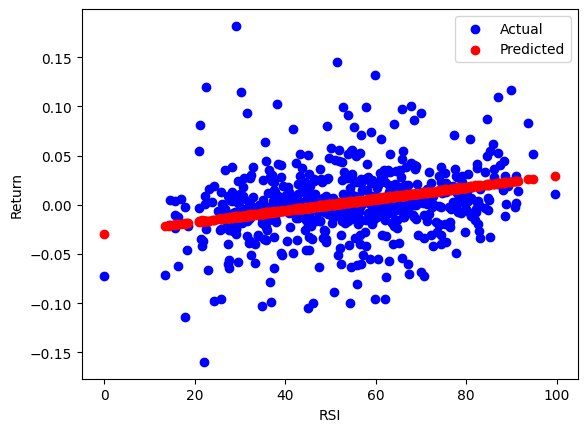

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('/BTC-USD.csv')


rsi_period = 14


close_prices = data['Close']


price_diff = close_prices.diff()


upward_price_change = price_diff.where(price_diff > 0, 0)
downward_price_change = -price_diff.where(price_diff < 0, 0)


average_gain = upward_price_change.rolling(window=rsi_period, min_periods=1).mean()
average_loss = downward_price_change.rolling(window=rsi_period, min_periods=1).mean()


relative_strength = average_gain / average_loss


rsi = 100 - (100 / (1 + relative_strength))


data['RSI'] = rsi


data['Price'] = data['Close']


daily_returns = close_prices.pct_change().dropna()


data['Return'] = daily_returns

data = data.dropna()

print(data.tail())


X = data[['RSI', 'Price']]
y = data['Return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

plt.scatter(X_test['RSI'], y_test, color='b', label='Actual')
plt.scatter(X_test['RSI'], y_pred, color='r', label='Predicted')
plt.xlabel('RSI')
plt.ylabel('Return')
plt.legend()
plt.show()


R-squared score: 0.09


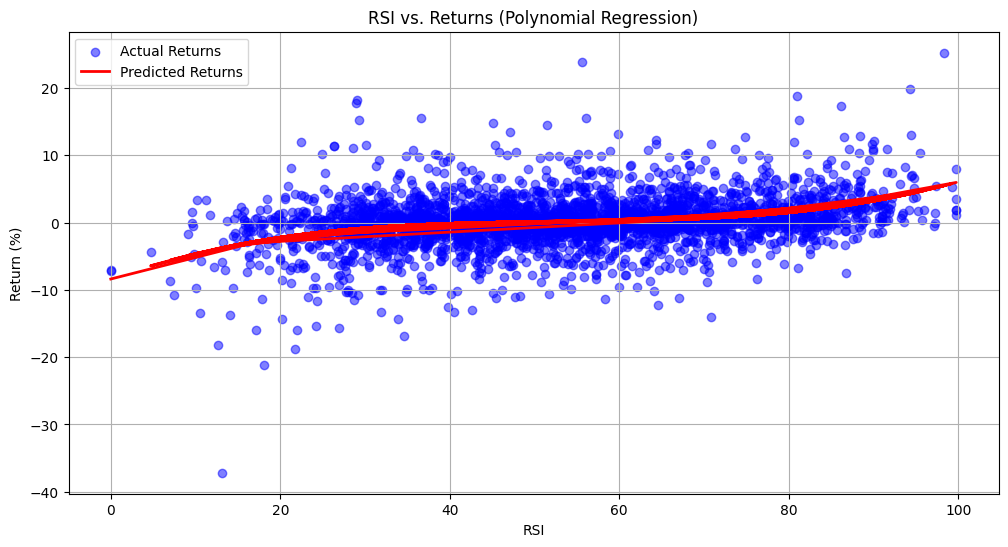

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 계산
df['RSI'] = calculate_rsi(df)


# 수익률 계산
df['Return'] = df['Close'].pct_change() * 100


# Feature와 Target 선택
X = df[['RSI']].dropna()
y = df['Return'].dropna()

# 다항 특성 생성
poly = PolynomialFeatures(degree=3)  # 2차 다항식 사용
X_poly = poly.fit_transform(X)

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 모델 평가
score = model.score(X_poly, y)
print(f'R-squared score: {score:.2f}')


# 모델 예측
y_pred = model.predict(X_poly)

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Returns', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Predicted Returns', linewidth=2)
plt.xlabel('RSI')
plt.ylabel('Return (%)')
plt.title('RSI vs. Returns (Polynomial Regression)')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


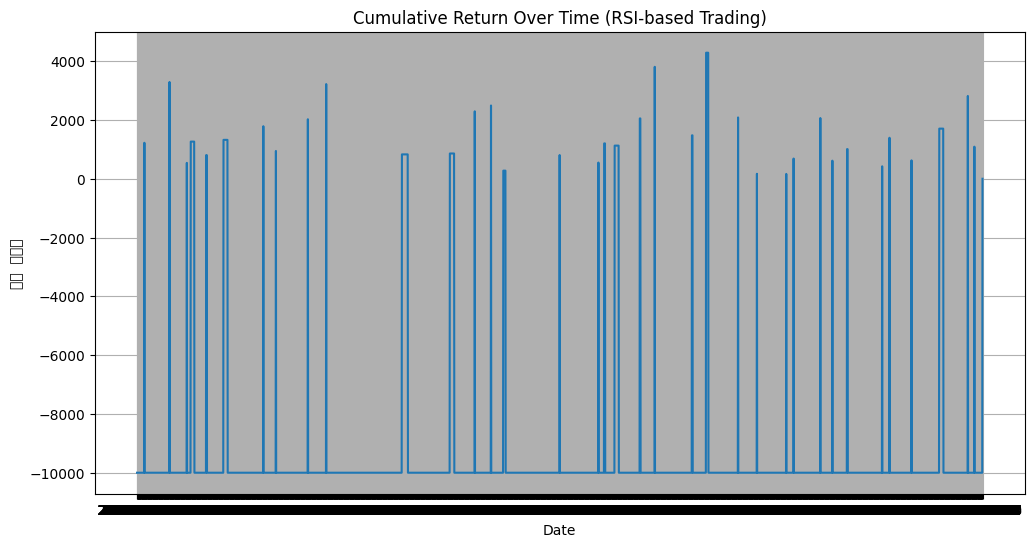

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 초기 자본 설정
initial_balance = 10000
balance = [initial_balance]
bitcoin_holdings = [0]

# RSI 기반 매매 시뮬레이션
for i in range(1, len(df)):
    rsi_value = df['RSI'].iloc[i]
    if rsi_value > 70:
        # RSI가 70을 초과하면 비트코인을 판매 (매도)
        bitcoin_to_sell = bitcoin_holdings[-1]
        balance.append(df['Close'].iloc[i] * bitcoin_to_sell)
        bitcoin_holdings.append(0)
    elif rsi_value < 30:
        # RSI가 30 미만이면 비트코인을 구매 (매수)
        bitcoin_to_buy = initial_balance / df['Close'].iloc[i]
        bitcoin_holdings.append(bitcoin_to_buy)
        balance.append(0)
    else:
        # RSI가 30에서 70 사이면 홀딩
        balance.append(balance[-1])
        bitcoin_holdings.append(bitcoin_holdings[-1])

# 시간에 따른 누적 수익률 계산
cumulative_returns = np.array(balance) - initial_balance

# 데이터 슬라이싱
df = df.iloc[-len(cumulative_returns):]

# 시간 순서대로 정렬
df = df[::-1]
cumulative_returns = cumulative_returns[::-1]

# 수익률 그래프화
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], cumulative_returns)
plt.xlabel('Date')
plt.ylabel('Cumulative Return') #누적 수익률
plt.title('Cumulative Return Over Time (RSI-based Trading)')
plt.grid()
plt.show()


#  그래프의 변화가 급격하게 보인다면 이는 시뮬레이션 결과가 RSI 기반 매매 전략에 따라서 발생하는 것일 수 있습니다. RSI 기반 매매 전략은 RSI 값에 따라 매수와 매도를 결정하므로,
# RSI 값이 급격하게 변할 때 매매가 이루어질 수 있습니다.

#  RSI 값의 급격한 변화는 주가의 가격 변동이나 추세 변화에 의해 발생할 수 있으며, 이로 인해 매매 시점이 변하게 됩니다.
# 따라서 그래프의 봉이 급격하게 솟거나 내려가는 부분은 RSI 값의 변화와 관련이 있을 것입니다.

#  이러한 현상을 완화하려면 더 복잡한 매매 전략을 구현하거나 스무딩(smoothing) 기법을 적용하여 그래프를 부드럽게 만들 수 있습니다.
# 예를 들어, 이동평균을 사용하여 가격 데이터를 평활화하거나, RSI 값의 변화를 고려하여 보다 조심스럽게 매매를 시뮬레이션할 수 있습니다.

#  또한, 시뮬레이션 결과를 해석할 때, 급격한 변동이 과거 데이터에 대한 예측의 결과로 인해 발생할 수 있으며, 미래 동안 이와 같은 변동이 지속될 것이라는 보장은 없다는 점을 고려해야 합니다.
# 이러한 시뮬레이션은 전략을 테스트하고 개선하는 데 도움이 되지만, 실제 투자 전략을 수립할 때에는 주의를 기울여야 합니다.


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix



# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (5일)
df['MA5'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (20일)
df['MA20'] = df['Close'].rolling(window=20).mean()

def selling(close, rsi, ma5, ma20, upperband, lowerband):

  if rsi > 70 and ma5 > ma20 and close > upperband:
    return 'sell'
  elif rsi < 30 and ma5 < ma20 and close < lowerband:
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'RSI', 'MA5', 'MA20', 'UpperBand', 'LowerBand']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['RSI'], x['MA5'], x['MA20'], x['UpperBand'], x['LowerBand']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(X.head())




         Close        RSI         MA5        MA20   UpperBand   LowerBand
19  330.079010  30.138935  342.807800  389.910399  461.027732  318.793066
20  336.187012  17.642549  335.030804  383.853049  451.334641  316.371457
21  352.940002  27.775350  333.716406  380.278049  446.265429  314.290668
22  365.026001  35.319233  340.948407  378.789549  444.741094  312.838004
23  361.562012  36.159745  349.158807  376.422450  441.211135  311.633765


모델 정확도: 0.9264568401371144
정밀도: 0.9306
Recall: 0.9311
F1 Score: 0.9308
              Close        RSI           MA5          MA20     UpperBand  \
index                                                                      
1        330.079010  30.138935    342.807800    389.910399    461.027732   
2        336.187012  17.642549    335.030804    383.853049    451.334641   
3        352.940002  27.775350    333.716406    380.278049    446.265429   
4        365.026001  35.319233    340.948407    378.789549    444.741094   
5        361.562012  36.159745    349.158807    376.422450    441.211135   
...             ...        ...           ...           ...           ...   
3205   30295.806641  47.255487  30623.704297  30493.777539  31200.593321   
3206   30249.132813  46.544245  30549.340625  30492.677637  31201.019052   
3207   30145.888672  39.781361  30500.189063  30465.563867  31183.843307   
3208   29856.562500  40.514953  30176.291797  30454.079688  31204.519333   
3209   30189.9023

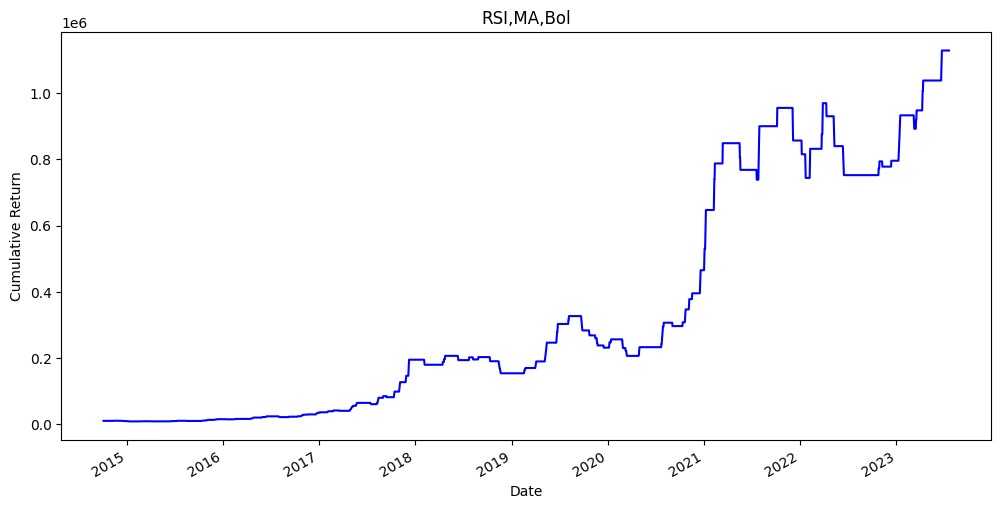

최종 수익: 1128973.4760740004


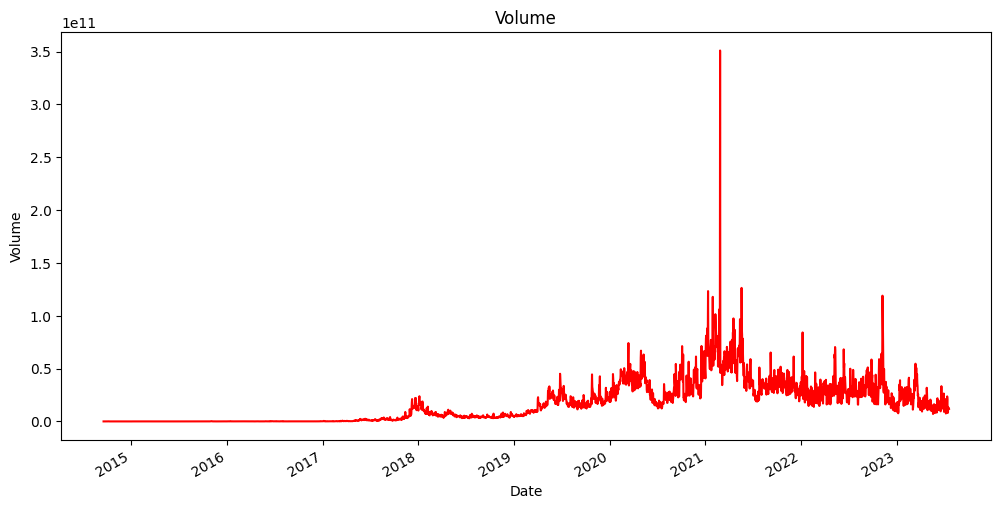

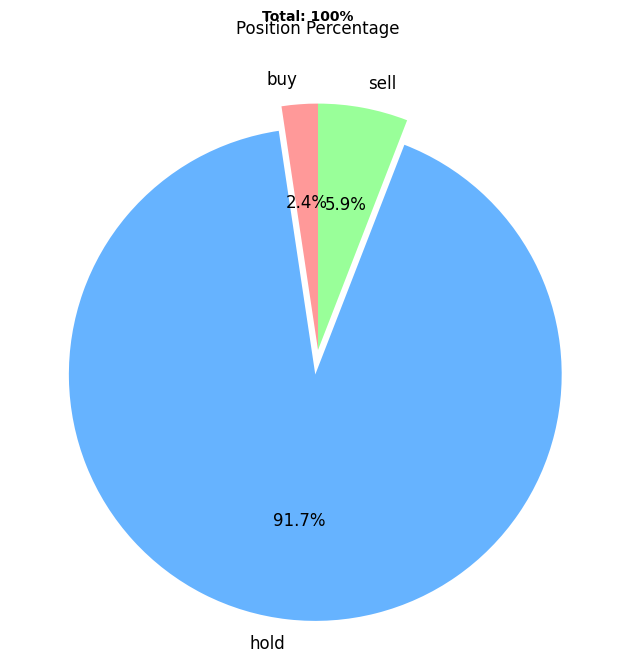

In [213]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('RSI,MA,Bol')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#거래량 그래프
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


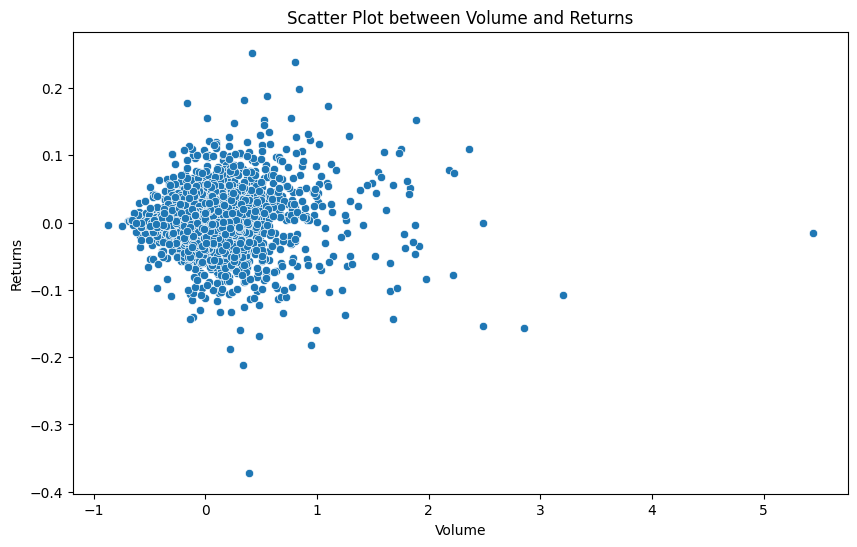

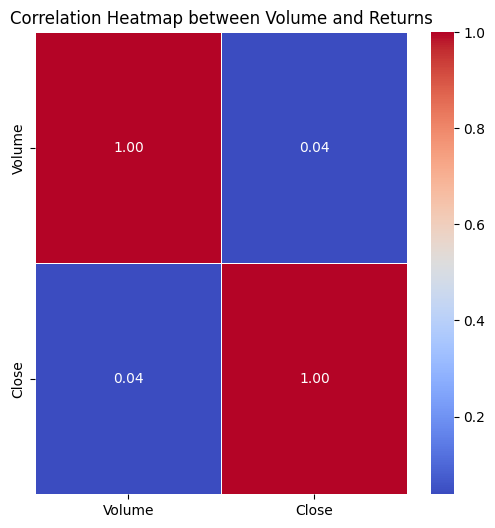

In [209]:
# 거래량과 수익률을 포함한 데이터 선택
correlation_data_volume_return = df[['Volume', 'Close']].pct_change().dropna()

# 상관 관계 계산
correlation_matrix_volume_return = correlation_data_volume_return.corr()

# 산점도 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=correlation_data_volume_return)
plt.title('Scatter Plot between Volume and Returns')
plt.xlabel('Volume')
plt.ylabel('Returns')
plt.show()

# 상관 관계 히트맵
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_volume_return, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Volume and Returns')
plt.show()


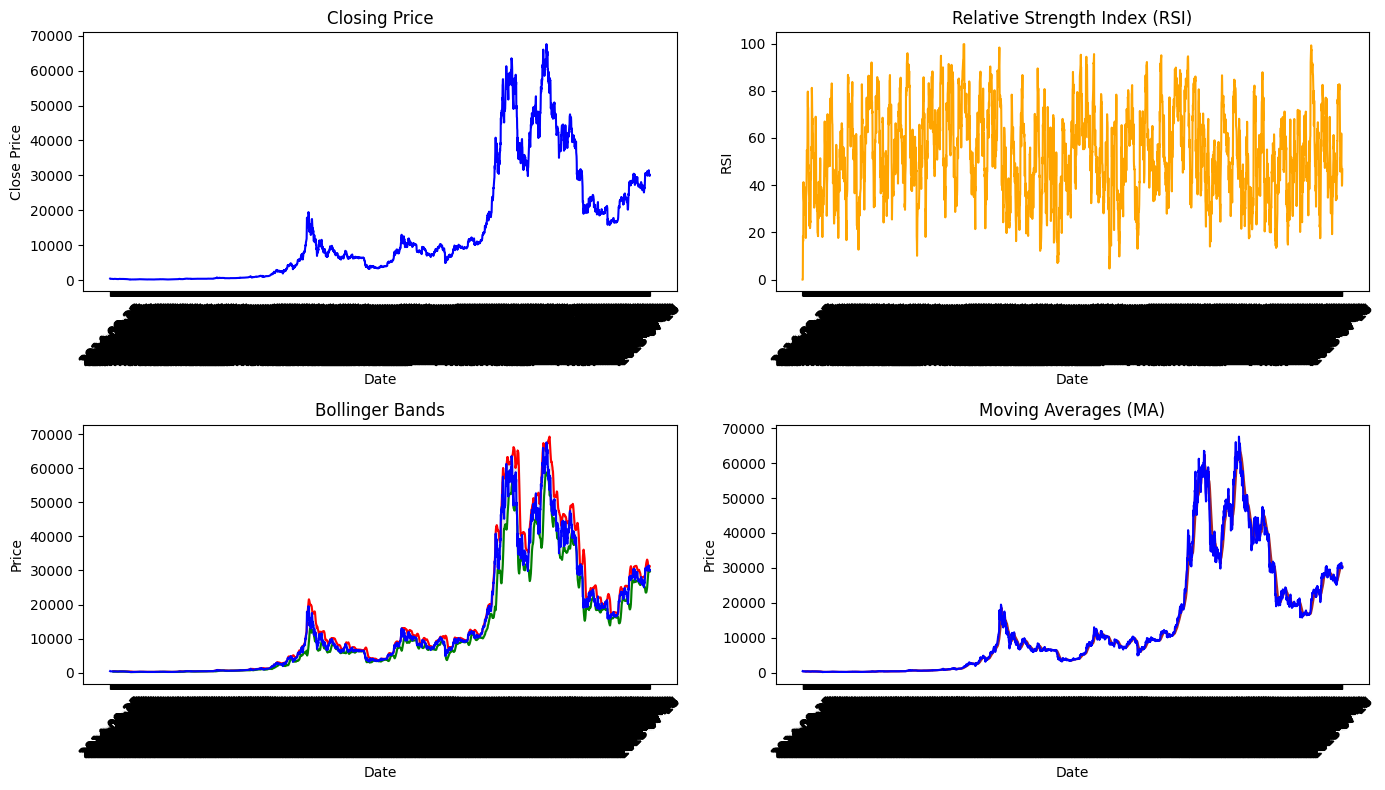

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")

# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 및 RSI 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (5일) 및 장기 이동 평균 (20일) 계산
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))

# 종가 그래프
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# RSI 그래프
plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)

# 볼린저 밴드 그래프
plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['UpperBand'], label='Upper Band', color='red')
plt.plot(df['Date'], df['LowerBand'], label='Lower Band', color='green')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.fill_between(df['Date'], df['UpperBand'], df['LowerBand'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# 이동 평균 그래프
plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['MA5'], label='MA5', color='purple')
plt.plot(df['Date'], df['MA20'], label='MA20', color='brown')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Moving Averages (MA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (5일)
df['MA20'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (20일)
df['MA50'] = df['Close'].rolling(window=20).mean()

def selling(close, rsi):

  if rsi > 70:
    return 'sell'
  elif rsi < 30:
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'RSI']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['RSI']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())




344
2221
662
        Close        RSI
1  424.440002   0.000000
2  394.795990   0.000000
3  408.903992  18.406697
4  398.821014  16.266763
5  402.152008  19.363753
   class_buy  class_hold  class_sell
1          1           0           0
2          1           0           0
3          1           0           0
4          1           0           0
5          1           0           0


모델 정확도: 0.9965912612333436
정밀도: 0.9984
Recall: 0.9966
F1 Score: 0.9975
              Close        RSI selling
index                                 
1        424.440002   0.000000     buy
2        394.795990   0.000000     buy
3        408.903992  18.406697     buy
4        398.821014  16.266763     buy
5        402.152008  19.363753     buy
...             ...        ...     ...
3223   30295.806641  47.255487    hold
3224   30249.132813  46.544245    hold
3225   30145.888672  39.781361    hold
3226   29856.562500  40.514953    hold
3227   30189.902344  46.708008    hold

[3227 rows x 3 columns]


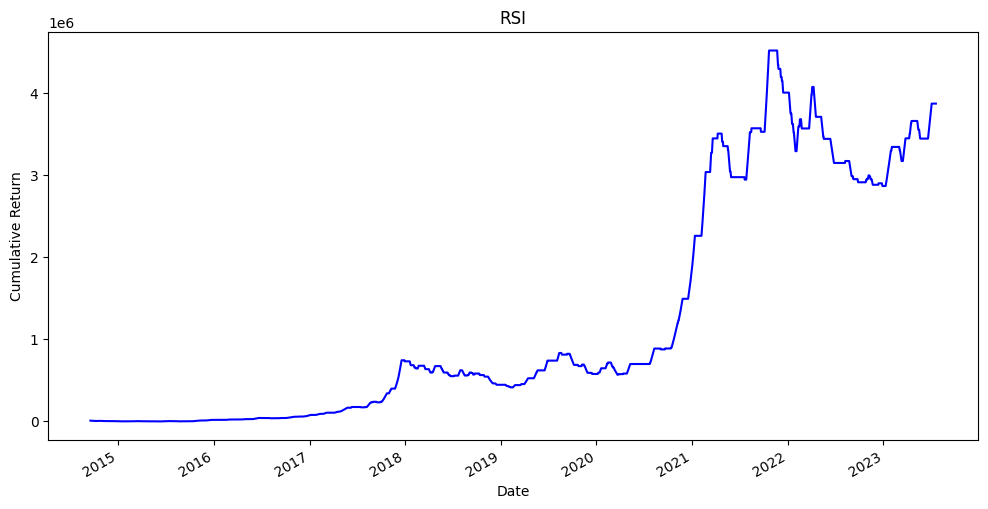

최종 수익: 3875908.0087200017


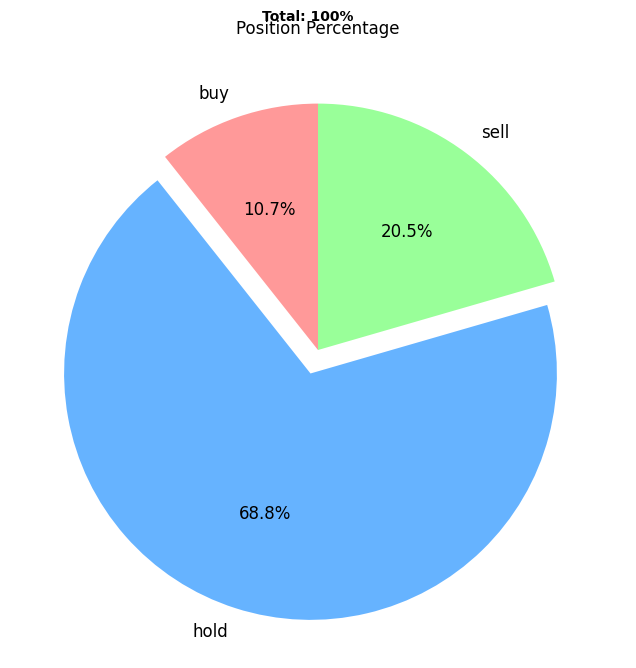

In [218]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('RSI')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (5일)
df['MA5'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (20일)
df['MA20'] = df['Close'].rolling(window=20).mean()

def selling(close,ma5, ma20):

  if ma5 > ma20 :
    return 'sell'
  elif ma5 < ma20 :
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'MA5','MA20']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['MA5'],x['MA20']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())




1430
0
1779
         Close         MA5        MA20
19  330.079010  342.807800  389.910399
20  336.187012  335.030804  383.853049
21  352.940002  333.716406  380.278049
22  365.026001  340.948407  378.789549
23  361.562012  349.158807  376.422450
    class_buy  class_sell
19          1           0
20          1           0
21          1           0
22          1           0
23          1           0


모델 정확도: 0.7641009660330321
정밀도: 0.7641
Recall: 0.7641
F1 Score: 0.7641
              Close           MA5          MA20 selling
index                                                  
1        330.079010    342.807800    389.910399     buy
2        336.187012    335.030804    383.853049     buy
3        352.940002    333.716406    380.278049     buy
4        365.026001    340.948407    378.789549     buy
5        361.562012    349.158807    376.422450     buy
...             ...           ...           ...     ...
3205   30295.806641  30623.704297  30493.777539    sell
3206   30249.132813  30549.340625  30492.677637    sell
3207   30145.888672  30500.189063  30465.563867    sell
3208   29856.562500  30176.291797  30454.079688     buy
3209   30189.902344  30147.458594  30441.307227     buy

[3209 rows x 4 columns]


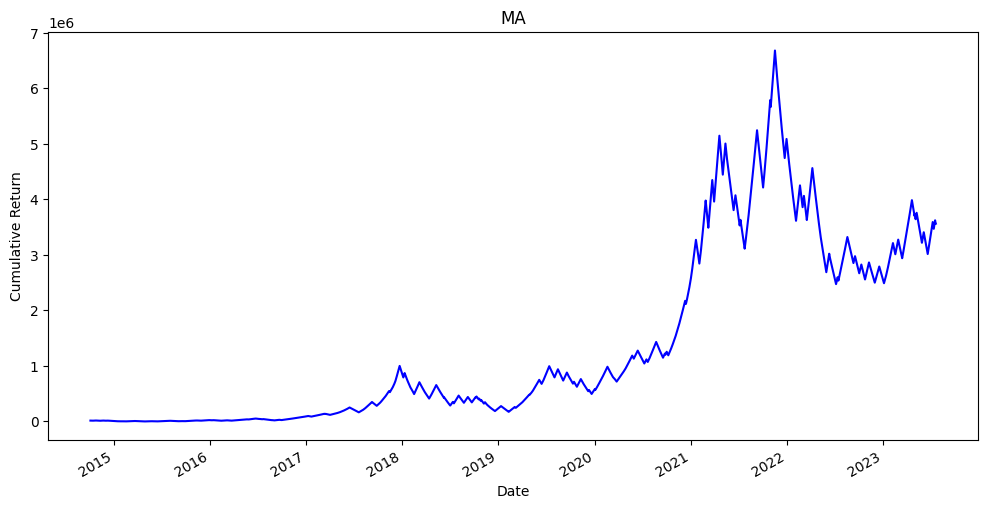

최종 수익: 3560928.097769995


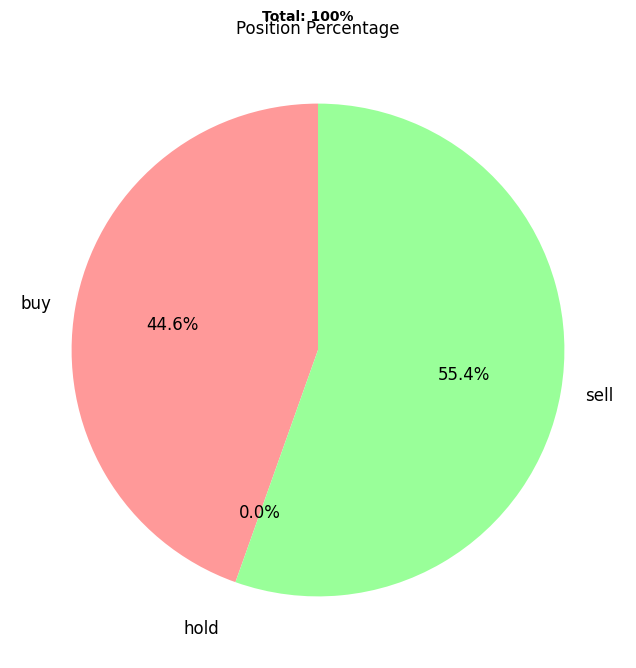

In [222]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('MA')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (20일)
df['MA20'] = df['Close'].rolling(window=10).mean()

# 장기 이동 평균 (50일)
df['MA50'] = df['Close'].rolling(window=50).mean()

def selling(close, upperband, lowerband):

  if close > upperband:
    return 'sell'
  elif close < lowerband:
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close','UpperBand', 'LowerBand']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'],x['UpperBand'], x['LowerBand']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())






127
2827
255
         Close   UpperBand   LowerBand
19  330.079010  461.027732  318.793066
20  336.187012  451.334641  316.371457
21  352.940002  446.265429  314.290668
22  365.026001  444.741094  312.838004
23  361.562012  441.211135  311.633765
    class_buy  class_hold  class_sell
19          0           1           0
20          0           1           0
21          0           1           0
22          0           1           0
23          0           1           0


모델 정확도: 0.8806481770021813
정밀도: 0.8809
Recall: 0.8828
F1 Score: 0.8819
              Close     UpperBand     LowerBand selling
index                                                  
1        330.079010    461.027732    318.793066    hold
2        336.187012    451.334641    316.371457    hold
3        352.940002    446.265429    314.290668    hold
4        365.026001    444.741094    312.838004    hold
5        361.562012    441.211135    311.633765    hold
...             ...           ...           ...     ...
3205   30295.806641  31200.593321  29786.961757    hold
3206   30249.132813  31201.019052  29784.336221    hold
3207   30145.888672  31183.843307  29747.284428    hold
3208   29856.562500  31204.519333  29703.640042    hold
3209   30189.902344  31201.010654  29681.603799    hold

[3209 rows x 4 columns]


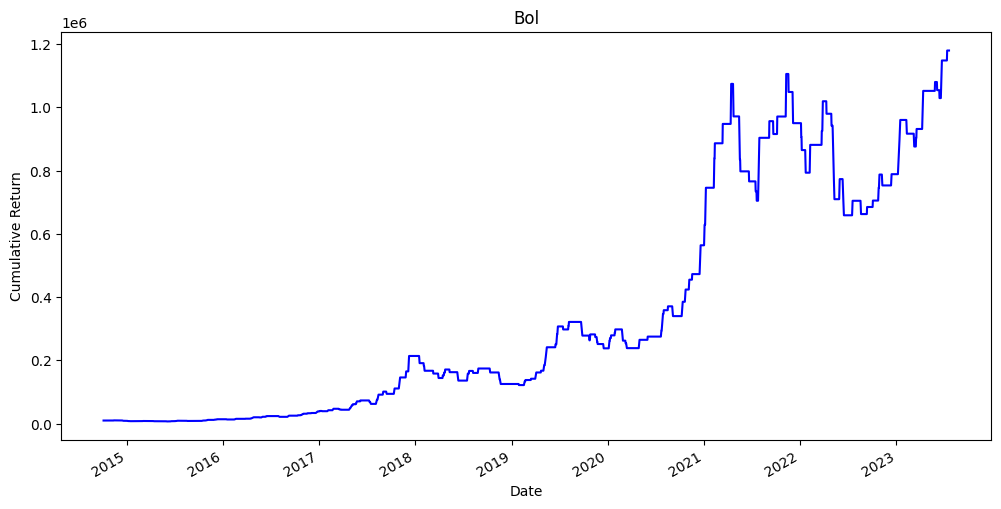

최종 수익: 1179902.00401


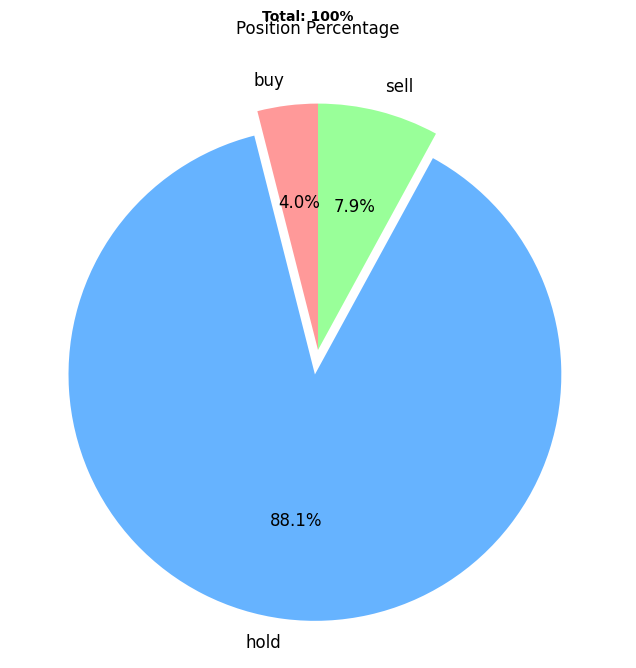

In [224]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Bol')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (5)
df['MA5'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (20)
df['MA20'] = df['Close'].rolling(window=20).mean()

def selling(close, rsi, ma5, ma20):

  if rsi > 70 and ma5 > ma20 :
    return 'sell'
  elif rsi < 30 and ma5 < ma20 :
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'RSI', 'MA5', 'MA20']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['RSI'], x['MA5'], x['MA20']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())




335
2215
659
         Close        RSI         MA5        MA20
19  330.079010  30.138935  342.807800  389.910399
20  336.187012  17.642549  335.030804  383.853049
21  352.940002  27.775350  333.716406  380.278049
22  365.026001  35.319233  340.948407  378.789549
23  361.562012  36.159745  349.158807  376.422450
    class_buy  class_hold  class_sell
19          0           1           0
20          1           0           0
21          1           0           0
22          0           1           0
23          0           1           0


모델 정확도: 0.9978186350888127
정밀도: 0.9978
Recall: 0.9978
F1 Score: 0.9978
              Close        RSI           MA5          MA20 selling
index                                                             
1        330.079010  30.138935    342.807800    389.910399    hold
2        336.187012  17.642549    335.030804    383.853049     buy
3        352.940002  27.775350    333.716406    380.278049     buy
4        365.026001  35.319233    340.948407    378.789549    hold
5        361.562012  36.159745    349.158807    376.422450    hold
...             ...        ...           ...           ...     ...
3205   30295.806641  47.255487  30623.704297  30493.777539    hold
3206   30249.132813  46.544245  30549.340625  30492.677637    hold
3207   30145.888672  39.781361  30500.189063  30465.563867    hold
3208   29856.562500  40.514953  30176.291797  30454.079688    hold
3209   30189.902344  46.708008  30147.458594  30441.307227    hold

[3209 rows x 5 columns]


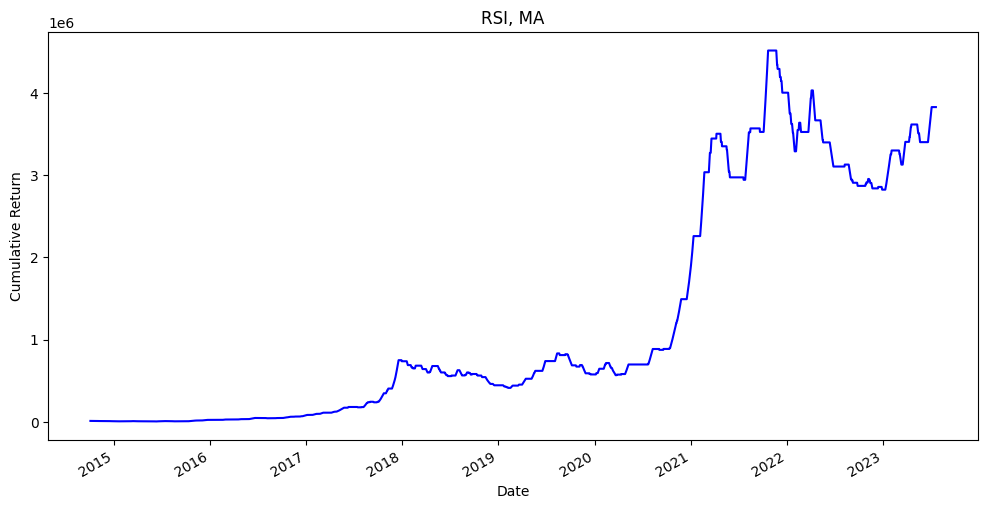

최종 수익: 3830858.9697490023


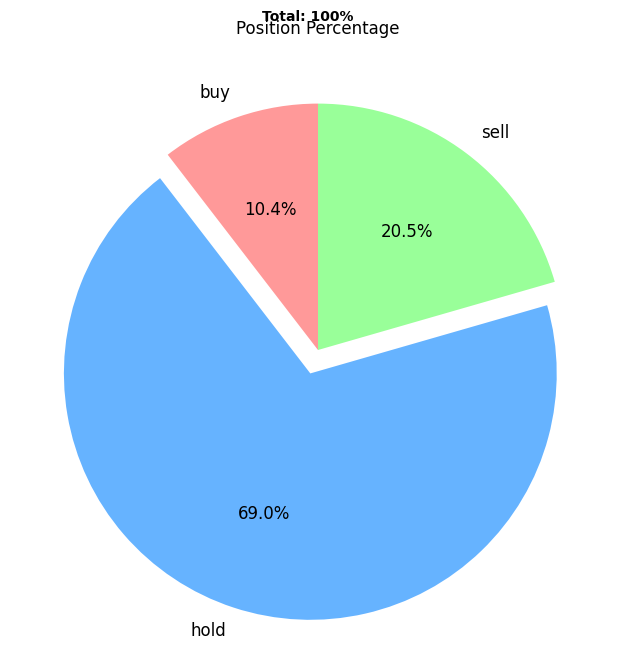

In [226]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('RSI, MA')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (20일)
df['MA20'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (50일)
df['MA50'] = df['Close'].rolling(window=20).mean()

def selling(close, rsi, upperband, lowerband):

  if rsi > 70 and close > upperband:
    return 'sell'
  elif rsi < 30 and close < lowerband:
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'RSI','UpperBand', 'LowerBand']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['RSI'],x['UpperBand'], x['LowerBand']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())




76
2944
189
         Close        RSI   UpperBand   LowerBand
19  330.079010  30.138935  461.027732  318.793066
20  336.187012  17.642549  451.334641  316.371457
21  352.940002  27.775350  446.265429  314.290668
22  365.026001  35.319233  444.741094  312.838004
23  361.562012  36.159745  441.211135  311.633765
    class_buy  class_hold  class_sell
19          0           1           0
20          0           1           0
21          0           1           0
22          0           1           0
23          0           1           0


모델 정확도: 0.8828295419133686
정밀도: 0.8830
Recall: 0.8844
F1 Score: 0.8837
              Close          MA20          MA50     UpperBand     LowerBand  \
index                                                                         
1        330.079010    342.807800    389.910399    461.027732    318.793066   
2        336.187012    335.030804    383.853049    451.334641    316.371457   
3        352.940002    333.716406    380.278049    446.265429    314.290668   
4        365.026001    340.948407    378.789549    444.741094    312.838004   
5        361.562012    349.158807    376.422450    441.211135    311.633765   
...             ...           ...           ...           ...           ...   
3205   30295.806641  30623.704297  30493.777539  31200.593321  29786.961757   
3206   30249.132813  30549.340625  30492.677637  31201.019052  29784.336221   
3207   30145.888672  30500.189063  30465.563867  31183.843307  29747.284428   
3208   29856.562500  30176.291797  30454.079688  31204.51933

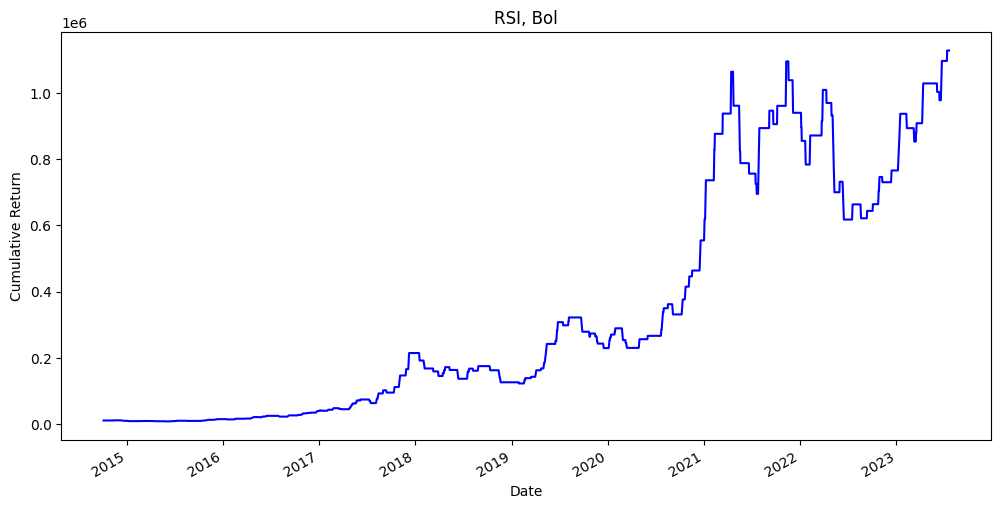

최종 수익: 1129386.265729


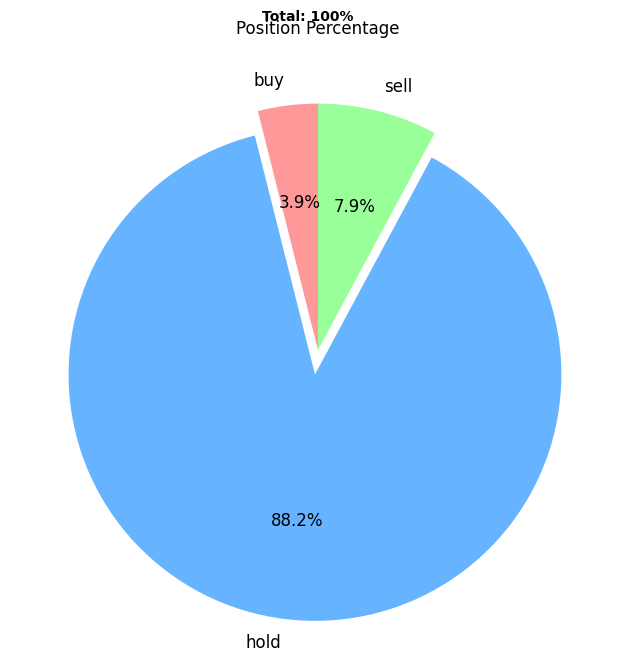

In [230]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('RSI, Bol')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")


# 볼린저 밴드 계산 함수 정의
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)

    return upper_band, lower_band

# RSI 계산 함수 정의
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼린저 밴드 계산
df['UpperBand'], df['LowerBand'] = calculate_bollinger_bands(df)

# RSI 계산
df['RSI'] = calculate_rsi(df)

# 단기 이동 평균 (20일)
df['MA20'] = df['Close'].rolling(window=5).mean()

# 장기 이동 평균 (50일)
df['MA50'] = df['Close'].rolling(window=20).mean()

def selling(close, ma20, ma50, upperband, lowerband):

  if ma20 > ma50 and close > upperband:
    return 'sell'
  elif ma20 < ma50 and close < lowerband:
    return 'buy'
  else:
    return 'hold'
# 특징과 타겟 선택
X = df[['Close', 'MA20', 'MA50', 'UpperBand', 'LowerBand']].dropna()
# 다중 분류 - 원-핫 인코딩

target = X.apply(lambda x : selling(x['Close'], x['MA20'], x['MA50'], x['UpperBand'], x['LowerBand']), axis=1)

y = pd.get_dummies(target, prefix='class')
y = y[:len(X)]

print(len([i for i in target if i == 'buy']))
print(len([i for i in target if i == 'hold']))
print(len([i for i in target if i == 'sell']))


print(X.head())
print(y.head())




126
2831
252
         Close        MA20        MA50   UpperBand   LowerBand
19  330.079010  342.807800  389.910399  461.027732  318.793066
20  336.187012  335.030804  383.853049  451.334641  316.371457
21  352.940002  333.716406  380.278049  446.265429  314.290668
22  365.026001  340.948407  378.789549  444.741094  312.838004
23  361.562012  349.158807  376.422450  441.211135  311.633765
    class_buy  class_hold  class_sell
19          0           1           0
20          0           1           0
21          0           1           0
22          0           1           0
23          0           1           0


모델 정확도: 0.8828295419133686
정밀도: 0.8830
Recall: 0.8844
F1 Score: 0.8837
              Close          MA20          MA50     UpperBand     LowerBand  \
index                                                                         
1        330.079010    342.807800    389.910399    461.027732    318.793066   
2        336.187012    335.030804    383.853049    451.334641    316.371457   
3        352.940002    333.716406    380.278049    446.265429    314.290668   
4        365.026001    340.948407    378.789549    444.741094    312.838004   
5        361.562012    349.158807    376.422450    441.211135    311.633765   
...             ...           ...           ...           ...           ...   
3205   30295.806641  30623.704297  30493.777539  31200.593321  29786.961757   
3206   30249.132813  30549.340625  30492.677637  31201.019052  29784.336221   
3207   30145.888672  30500.189063  30465.563867  31183.843307  29747.284428   
3208   29856.562500  30176.291797  30454.079688  31204.51933

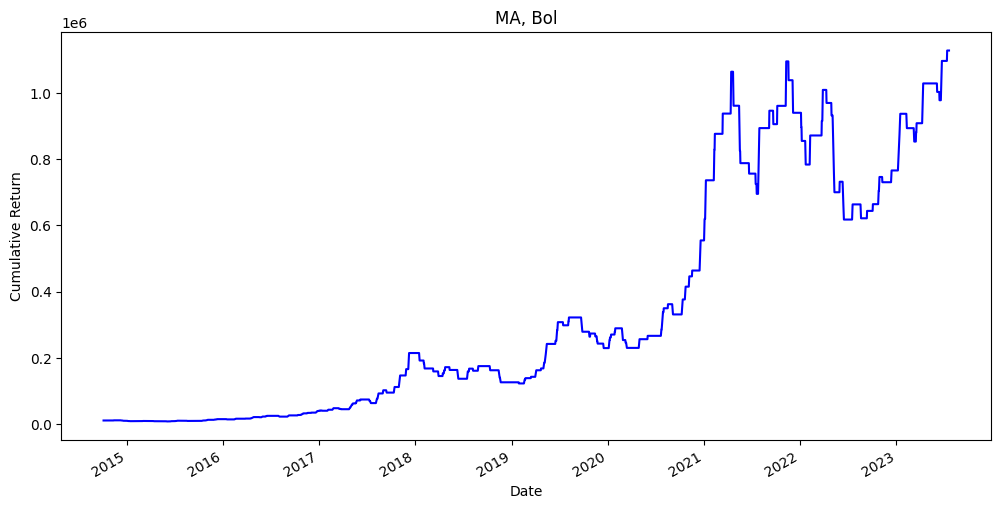

최종 수익: 1129386.265729


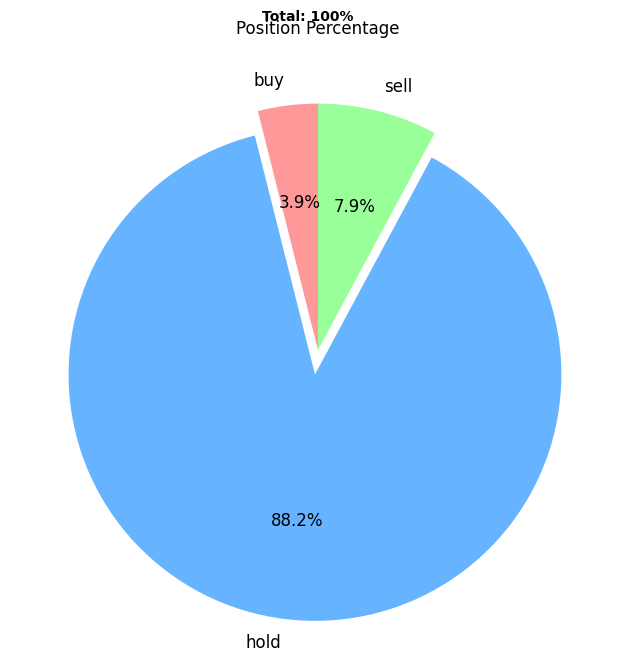

In [231]:

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = XGBClassifier(learning_rate=0.1, n_estimators=40, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = model.predict(X)

# 예측 정확도 평가
accuracy = accuracy_score(y, y_pred)
print(f"모델 정확도: {accuracy}")
precision = precision_score(y, y_pred, average='micro')
print(f"정밀도: {precision:.4f}")
recall = recall_score(y, y_pred, average='micro')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y, y_pred, average='micro')
print(f"F1 Score: {f1:.4f}")

Z = pd.concat([X, target], axis=1)
# 매매 시뮬레이션
Z['index'] = range(1, len(Z) + 1)
Z.rename(columns = {0 : 'selling'}, inplace = True)
Z = Z.set_index(['index'])

print(Z)

money = [10000]

for i, v in Z.iterrows():
  if v['selling'] == 'buy':
    money.append(money[i-1] - v['Close'])
  elif v['selling'] == 'sell':
    money.append(money[i-1] + v['Close'])
  else:
    money.append(money[i-1])

import matplotlib.pyplot as plt
from datetime import datetime

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].loc[18:], money, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('MA, Bol')

# x축 틱 설정
plt.xticks(rotation=45)  # 45도 회전
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()

plt.show()

# 최종 수익 출력
final_balance = money[-1]
print(f"최종 수익: {final_balance}")

#파이차트
p_buy = len([i for i in target if i == 'buy'])
p_hold= len([i for i in target if i == 'hold'])
p_sell = len([i for i in target if i == 'sell'])

p_labels = ['buy','hold','sell']
p_size = [p_buy,p_hold,p_sell]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(p_size, labels=p_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})


plt.title('Position Percentage')

plt.suptitle('Total: 100%', y=0.92, fontsize=10, fontweight='bold')

plt.show()
